In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

KsspSlab (generic function with 1 method)

In [4]:
mat1 = material(1.0^2,1.0)
mat2 = material(epstable("gold"),1.0)

#λ = 450:15:1000
λ = 400:10:700
k₀ = 2π./λ;

In [5]:
matScatter = [mat1; mat2];

In [6]:
#w,d = 413.,10.
w,d = 50.,17.
rc = 2.
Nc,Nw,Nd = 3,10,5
xC = (0,0);

In [7]:
rod = Rod(w,d,rc,Nc,Nw,Nd);

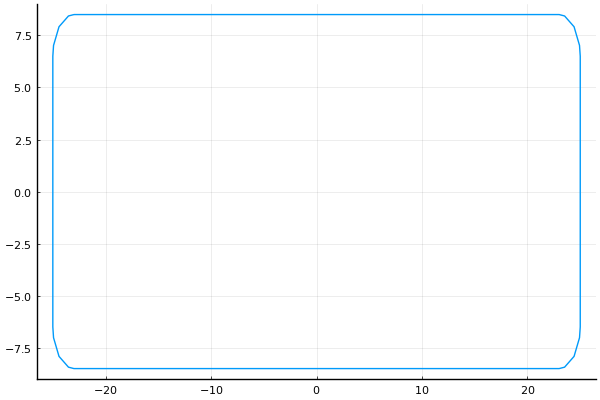

In [8]:
X,Y = getSurfPoints(rod)
plot(X,Y,legend=:none)

In [9]:
u =1
dThr = 100.
m = 2

2

In [10]:
str = rod
rp,sArr = getSvec(m,rod);

In [11]:
i = 1
r = 500.
α = -90.

-90.0

In [12]:
@time σₐArr = getσₐ(m,k₀,matScatter,str,dThr,α);

 92.313722 seconds (1.62 G allocations: 71.620 GiB, 18.26% gc time, 87.93% compilation time)


In [13]:
@time σₑArr = getσₑ(m,k₀,matScatter,str,dThr,r,α);

 65.666641 seconds (1.61 G allocations: 70.717 GiB, 23.84% gc time, 3.00% compilation time)


In [14]:
@time σₛArr = getσₛ(m,k₀,matScatter,str,dThr,r,α);

125.500115 seconds (3.00 G allocations: 112.859 GiB, 23.52% gc time, 0.73% compilation time)


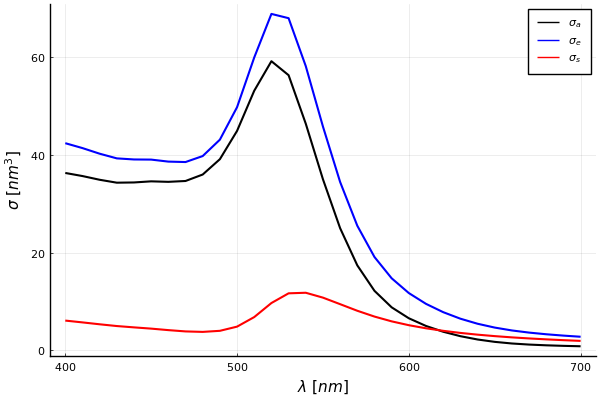

In [15]:
plot(2π./k₀,σₐArr,c=:black,lw=1.5,label=L"σ_a")
plot!(2π./k₀,σₑArr,c=:blue,lw=1.5,label=L"σ_e")
plot!(2π./k₀,σₛArr,c=:red,lw=1.5,label=L"σ_s",xlabel=L"\lambda~[nm]",ylabel=L"\sigma~[nm^3]")